<div align="center"><font size=15>Classification by Clustering</font></div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Iris-Dataset" data-toc-modified-id="Iris-Dataset-1">Iris Dataset</a></span></li><li><span><a href="#Classifying-Types-of-Iris-Flowers-with-K-Means" data-toc-modified-id="Classifying-Types-of-Iris-Flowers-with-K-Means-2">Classifying Types of Iris Flowers with K-Means</a></span><ul class="toc-item"><li><span><a href="#Purity-of-Clusters" data-toc-modified-id="Purity-of-Clusters-2.1">Purity of Clusters</a></span></li><li><span><a href="#Classify-Using-the-Clusters" data-toc-modified-id="Classify-Using-the-Clusters-2.2">Classify Using the Clusters</a></span></li></ul></li></ul></div>

The Old Faithful data only contained samples consisting of the duration of each eruption and the interval between eruptions.  We had fun trying to identify clusters of these samples in two dimensions.

Sometimes data samples also come with *labels* indicating to which category each sample belongs.  For example, you might have a bunch of photos of cats and dogs with each one labelled as "cat" or "dog".

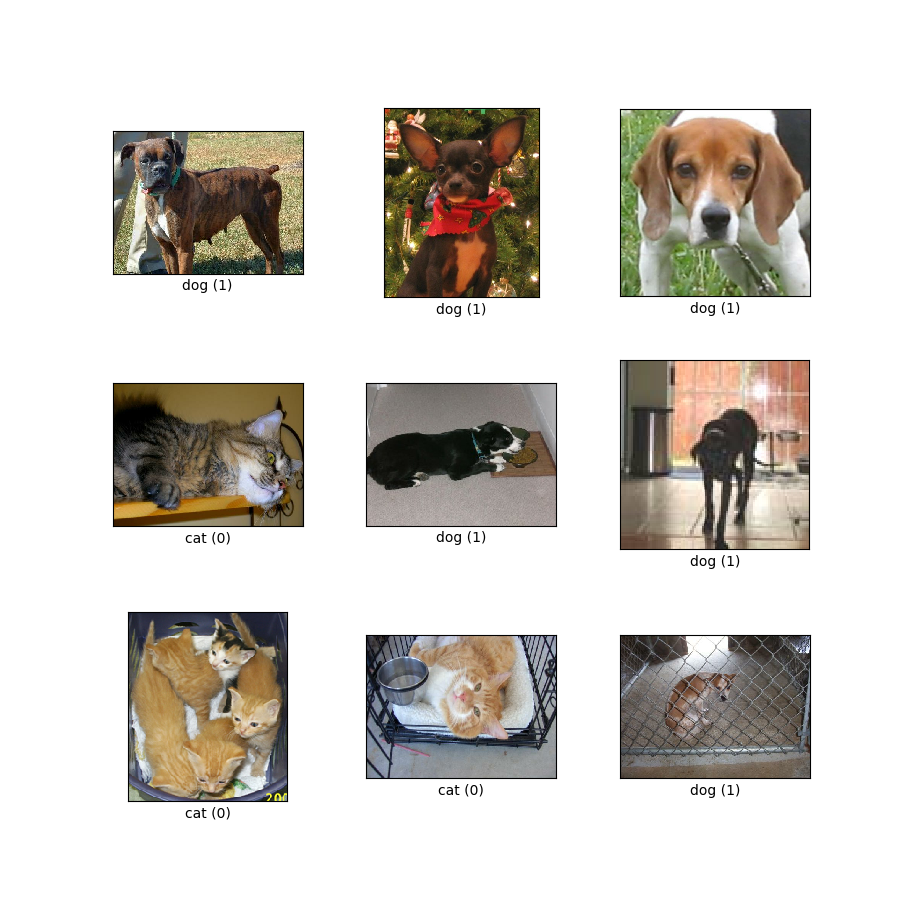

Another example is the [Iris data set](https://rstudio-pubs-static.s3.amazonaws.com/568691_afb34f2ab2ad4734b63064a2dcf25931.html#:~:text=The%20Iris%20flower%20data%20set,example%20of%20linear%20discriminant%20analysis.) that is a collection of measurements that Fisher made in 1936 of the width length and width of the sepals and petals of iris flowers! Each sample is labeled by its genus and species.  

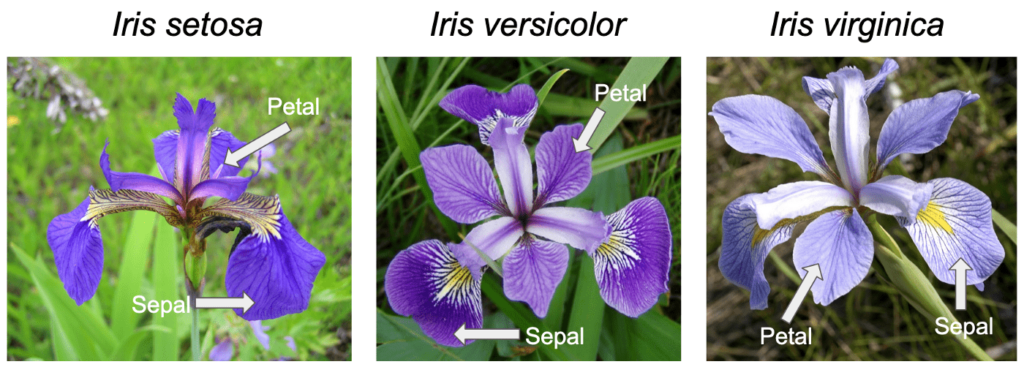

Fisher, and many others since, have applied a wide variety of visualization, statistical and machine learning classification methods to this data.

# Iris Dataset

We can download this data from [this UCI ML Repository site](https://archive-beta.ics.uci.edu/dataset/53/iris).  From that site, you can download `bezdekIris.data` and `iris.names`.  In `iris.names` you will find a description that says `bezdekIris.data` includes corrections for a couple of the samples.

Now, let's take a peak at the data file, then read it in.


In [4]:
!head bezdekIris.data

5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5.0,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa


Humm....no heading line.  Well, `iris.names` tells us what the attributes are.  And we see that the last column is the genus-species name.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
datadf = pd.read_csv('bezdekIris.data', header=None)
column_names = ('sepal length (cm)', 'sepal width (cm)', 
                'petal length (cm)', 'petal width (cm)',
                'genus-species')
datadf.columns = column_names
datadf

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),genus-species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
X = datadf.values
print(X.dtype)
X[:10, :]

object


array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa']], dtype=object)

In [8]:
labels = X[:, -1]
labels

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [9]:
np.unique(labels)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
X = X[:, :4]
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.0, 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5.0, 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3.0, 1.4, 0.1],
       [4.3, 3.0, 1.1, 0.1],
       [5.8, 4.0, 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1.0, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5.0, 3.0, 1.6, 0.2],
       [5.0, 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [11]:
X = X.astype(float)
X.dtype

dtype('float64')

In [12]:
# np.hstack((X, labels))

In [13]:
X.shape, labels.shape

((150, 4), (150,))

Change the shape of `labels` so we truly have parallel arrays with rows corresponding to the same samples.

In [14]:
labels = labels.reshape(-1, 1)
labels.shape

(150, 1)

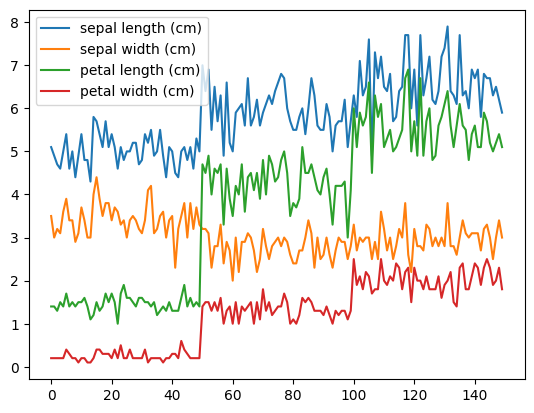

In [15]:
plt.plot(X)
plt.legend(column_names[:-1]);

# Classifying Types of Iris Flowers with K-Means

It looks like we might be able to distinguish the type of iris using just the green line.  We can test this by plotting the iris type versus the petal length.  First we need to convert the iris type into numbers, like 0, 1, and 2.

In [16]:
types = np.unique(labels)
types

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [17]:
labels == types

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ T

In [18]:
labels_ints = np.argmax(labels == types, axis=1)
labels_ints

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
labels_ints = labels_ints.reshape(-1, 1)

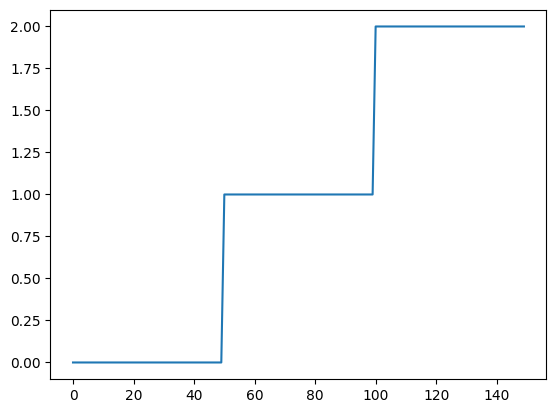

In [20]:
plt.plot(labels_ints);

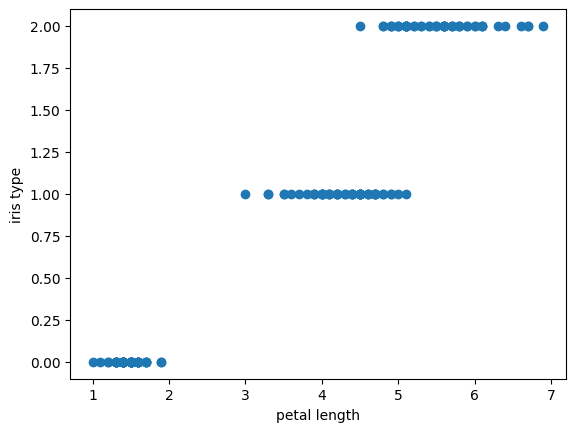

In [21]:
plt.plot(X[:, 2], labels_ints, 'o')
plt.xlabel('petal length')
plt.ylabel('iris type');

Well, I guess not.  The second and third types have overlapping petal lengths.

At this point it is often helpful to visually look for correlations between all pairs of sample attributes and the labels.  We have four attributes and one label, so let's make plots of all pairs!

In [22]:
X_and_labels = np.hstack((X, labels_ints))
X_and_labels[:5]

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ]])

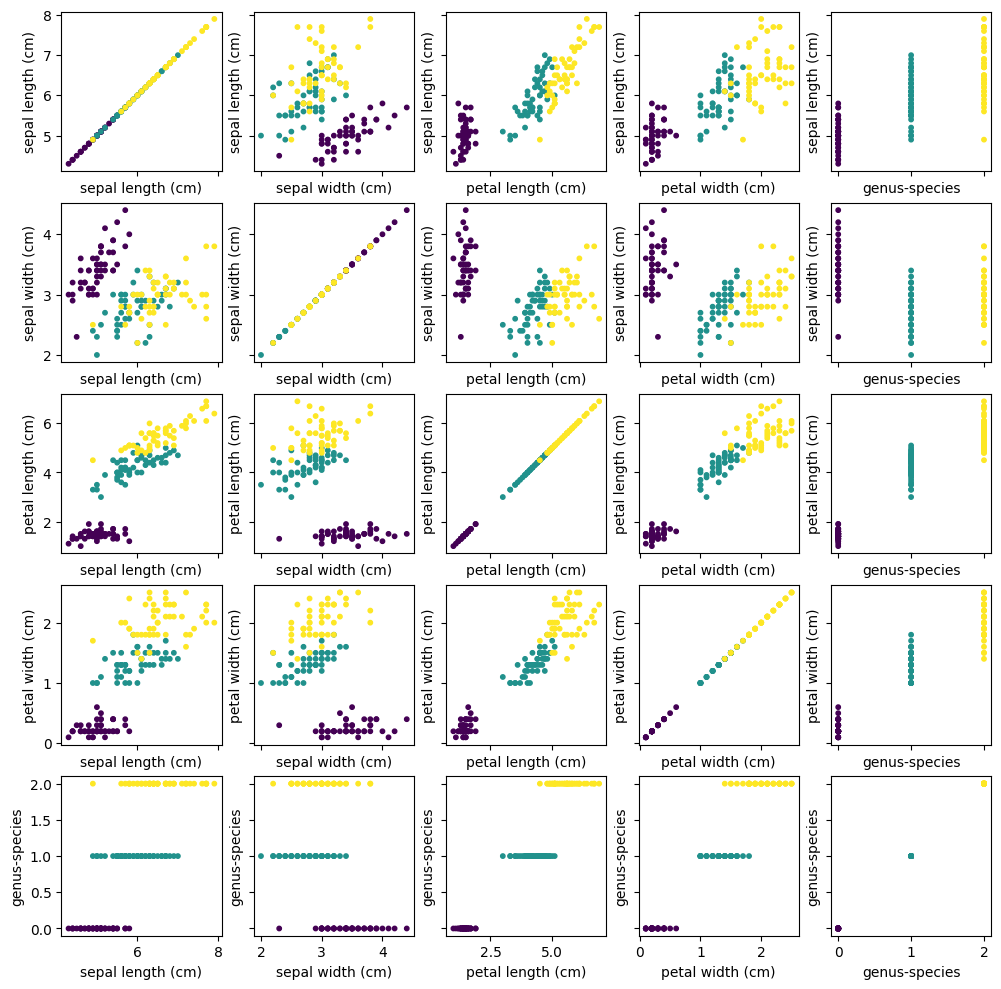

In [23]:
plt.figure(figsize=(12, 12))
fig, axes = plt.subplots(5, 5, sharex='col', sharey='row', num=plt.gcf())

for row_i in range(5):
    for col_i in range(5):
        ax = axes[row_i, col_i]
        ax.scatter(X_and_labels[:, col_i], X_and_labels[:, row_i], 
                   s=10, c=labels_ints)
        ax.set_xlabel(column_names[col_i])
        ax.set_ylabel(column_names[row_i])
        
# for ax in axes.flat:
#     ax.label_outer()

# plt.tight_layout()

Judging from the bottom row, it doesn't look like any single attribute of an iris flower correlates well with the genus-species.

Good!  We now have a challenging classification problem.  How do we classify a four-dimensional sample into the correct iris type?

What method shall we try?  Well....uh....so far we have only looked at clustering.  Can we use clustering to classify?

The most common answer to a machine learning question like this is, "it depends".   The answer to this question would be "yes", if the clusters we find all contain the same type of iris.

Let's try clustering this data and see what happens---except we can't really see four-dimensional clusters.  Rats!

In [24]:
def calc_J(squared_distances):
    # squared_distances = np.sum((centers[:, np.newaxis, :] - data)**2, axis=2)
    return np.sum(np.min(squared_distances, axis=0))

def kmeans(data, k, n_iterations):

    # Initialize centers and list J to track performance metric
    centers = data[np.random.choice(range(data.shape[0]), k, replace=False), :]

    J = []
    
    for iteration in range(n_iterations):
        
        # Which center is each sample closest to?
        squared_distances = np.sum((centers[:, np.newaxis, :] - data)**2, axis=2)
        closest = np.argmin(squared_distances, axis=0)
        
        # Calculate J and append to list J
        J.append(calc_J(squared_distances))
        
        # Update cluster centers
        for i in range(k):
            centers[i, :] = data[closest == i, :].mean(axis=0)
            
    # Calculate J one final time and return results
    squared_distances = np.sum((centers[:, np.newaxis, :] - data)**2, axis=2)
    J.append(calc_J(squared_distances))
    
    return centers, J, closest

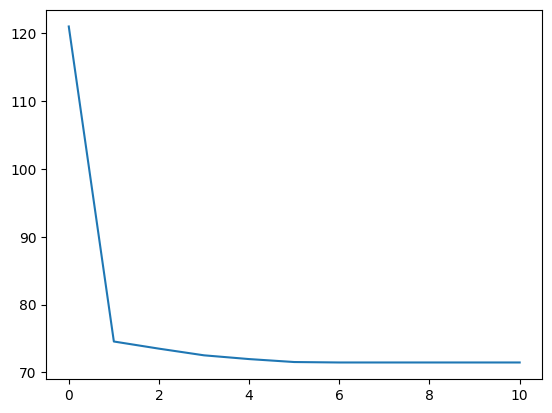

In [25]:
k = 4
centers, J, closest = kmeans(X, k, 10)
plt.plot(J);

Well, $J$ doesn't tell us much about the makeup of our clusters.  Now that we have data with labels for each sample, what other metric can you think of for evaluating the quality of our clustering result?

##  Purity of Clusters

How about measuring the "purity" of each cluster, meaning the number of each type of iris in each cluster.

In [26]:
types

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [27]:
n_types = len(types)

In [28]:
types_in_each_cluster = np.zeros((k, n_types), dtype=int)

for cluster in range(k):
    species_in_cluster = labels_ints[closest == cluster]
    # [0] in next statement converts result of sum from array to scaler value
    counts = [sum(species_in_cluster == label)[0] for label in range(n_types)]
    types_in_each_cluster[cluster] = counts

pd.DataFrame(types_in_each_cluster, index=[f'Cluster {i}' for i in range(1, k+1)], columns=types)

,Iris-setosa,Iris-versicolor,Iris-virginica
Cluster 1,0,3,36
Cluster 2,28,0,0
Cluster 3,0,47,14
Cluster 4,22,0,0


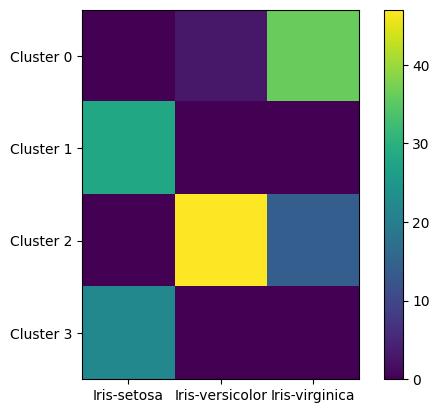

In [29]:
plt.imshow(types_in_each_cluster)
# plt.xlabel('types')
plt.xticks([0, 1, 2], types)
# plt.ylabel('cluster')
plt.yticks(range(k), [f'Cluster {i}' for i in range(k)])
plt.colorbar();

What do you see? How pure are our clusters?

## Classify Using the Clusters

Now, how could we use our clusters to classify a sample?  

Right.  We could classify a sample according the the most common type of iris in the cluster containing the sample.  First we must find this most common type in each cluster.

In [30]:
cluster_labels = []
for cluster in range(k):
    species_in_cluster = labels_ints[closest == cluster]
    # [0] in next statement converts result of sum from array to scaler value
    counts = [sum(species_in_cluster == label)[0] for label in range(n_types)]
    
    most_common_label = types[np.argmax(counts)]
    cluster_labels.append(most_common_label)
cluster_labels

['Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa']

We already have `closest`, telling us which cluster each sample belongs to.  So now we just have to convert that integer to a iris type.

In [31]:
closest

array([1, 3, 3, 3, 1, 1, 3, 1, 3, 3, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 3, 3, 1, 1, 1, 3, 3, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 3, 3, 1,
       1, 3, 1, 3, 1, 3, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [32]:
# cluster_labels[[0,2]]

In [33]:
np.array(cluster_labels)[[0,2]]

array(['Iris-virginica', 'Iris-versicolor'], dtype='<U15')

In [34]:
np.array(cluster_labels)[closest]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicol

Now we just have to compare these to the true labels.

In [35]:
predicted_type = np.array(cluster_labels)[closest].reshape(-1, 1)
sum(predicted_type == labels)

array([133])

In [36]:
predicted_type = np.array(cluster_labels)[closest].reshape(-1, 1)
fraction_correct = np.sum(predicted_type == labels) / len(predicted_type)
f'{fraction_correct * 100:.1f} correct'

'88.7 correct'

*This notebook is part of  course materials for CS 345: Machine Learning Foundations and Practice at Colorado State University. Authors include Asa Ben-Hur, Ross Beveridge, and Chuck Anderson.*

*The text is released under the [CC BY-SA license](https://creativecommons.org/licenses/by-sa/4.0/), and code is released under the [MIT license](https://opensource.org/licenses/MIT).*